## Hausaufgabe 6

### Abgage via studip bis spätestens 03.07. 12:00 Uhr (zur VL)! 
### Verteidigung 06.07. 08:00-11:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Geben Sie eine Lösung pro Gruppe ab und packen Sie Ihre Lösung in eine Zip-Datei mit dem Namen und Matrikelnummer eines Mitglieds. Also z.B. `mustermann_12345678.zip` 

## Aufgabe 1 (10%)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#### 1. (10%) Laden Sie das Titanic Dataset als Pandas DataFrame. Beantworten Sie folgende Fragen, indem Sie den Pandas Dataframe mit geeigneten Funktionen und Transformationen bearbeiten:

In [2]:
file_path = "titanic.csv"
titanic = pd.read_csv(file_path)

a) (5%) Was ist der durchschnittliche Ticketpreis pro Klasse?

In [3]:
titanic.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

b) (5%) Welche Ticket Klasse hat eine höhere Überlebensrate?

In [4]:
titanic.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

---

## Aufgabe 2 (40%)

#### 1. (3%) Definieren Sie mit dem package "scipy" eine Gaussverteilung mit Mittelwert 10 and Standardabweichung 3 

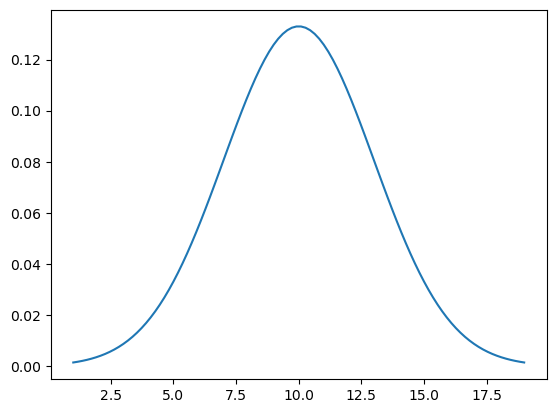

In [5]:
mu = 10
sigma = 3
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)

Quelle: https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

#### 2. (10%) Ziehen Sie aus dieser Verteilung n = [100, 1000, 10000] Stichproben, und plotten Sie diese Stichproben-Verteilungen als Histogramme in einer 3-teiligen Figure. Plotten Sie dann auf die Histogramme die PDF der Verteilung. 

10 Stichproben: 2.8072279994597378
100 Stichproben: 2.53057789981671
1000 Stichproben: 2.9021272882554547


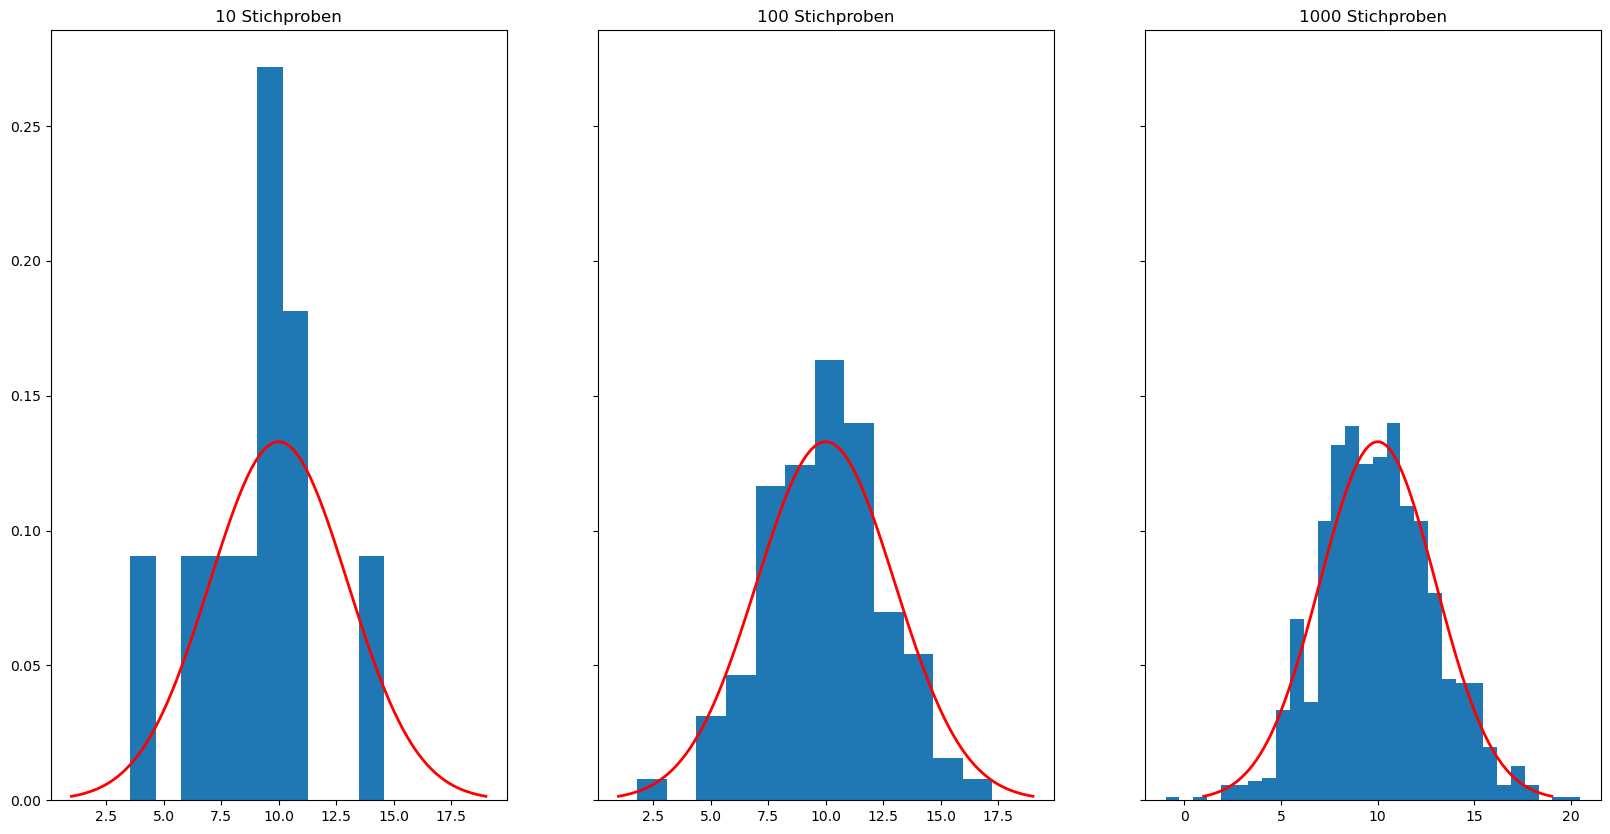

In [6]:
fig, axes = plt.subplots(ncols=3, sharex='col', sharey='row', figsize=(20, 10))


# Erzeuge eine normalverteilte Zufallsvariable
gaussian = stats.norm(loc=mu, scale=sigma)

for i, ax in enumerate(axes.flatten()):
    # Ziehe 10 zufällige Stichproben aus der Verteilung
    samples = gaussian.rvs(size=10**(i+1))
    print(f"{10**(i+1)} Stichproben: {samples.std()}")

    # Plot des Histogramms der Stichproben
    ax.hist(samples, bins=((10**(i+1))//50+10), density=True) # Bins sind dynamisch, kann man auch auf 20 setzen
    ax.set_title(f"{10**(i+1)} Stichproben")
    ax.plot(x, gaussian.pdf(x), 'r-', lw=2)


#### 3. (2%) Was ist der Unterschied zwischen der Standardabweichung (STD) der Stichprobenverteilung und der STD der zugrundeliegenden Gaussverteilung? Stimmt das mit Ihren empirischen Ergebnissen überein?

Mit zunehmendem n nähert sich das STD dem STD der zugrundeliegenden Gaussverteilung an.

#### 4. (10%) Laden Sie den numpy array `sample.npy`. Berechnen Sie das 95% Konfidenzintervall für den Mittelwert via Bootstrapping und vergleichen Sie ihn mit dem theoretischen Wert.

In [7]:
sample = np.load("sample.npy")
mean = np.mean(sample)

# samples must be in a sequnece 
bootstrap_ci = stats.bootstrap((sample,), np.mean, confidence_level=0.95)
print(bootstrap_ci.confidence_interval)

print(mean)

ConfidenceInterval(low=4.953891920603694, high=6.08766889178823)
5.508745991807496


#### 5. (15%) Die Null Hypothese ist nun, dass der Mittelwert gleich 5 ist. Die Alternative Hypothese ist, dass er ungleich 5 ist. Würden Sie die Null Hypothese verwerfen? Nutzen Sie Bootstrapping.

In [8]:
# Liste zur Speicherung der Bootstrap-Mittelwerte
bootstrap_means = []

iterations = 1000

# Bootstrapping
for _ in range(iterations):
    # Ziehen einer Stichprobe mit Ersatz aus dem Datensatz
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Berechnung des Mittelwerts der Bootstrap-Stichprobe
    bootstrap_mean = bootstrap_sample.mean()
    
    # Hinzufügen des Bootstrap-Mittelwerts zur Liste
    bootstrap_means.append(bootstrap_mean)

# Berechnung des p-Werts
p_value = np.sum(np.abs(bootstrap_means - np.mean(sample)) >= np.abs(np.mean(sample) - 5)) / iterations

# Entscheidung basierend auf dem p-Wert
alpha = 0.05  # Signifikanzniveau
reject_null = p_value < alpha
print(p_value)
print(alpha)

0.072
0.05


Wir können nicht auschließen, dass der Mittelwert gleich 5 ist.

## Aufgabe 3 (50%)

#### Wir wollen wissen, ob die Gruppen in diesem Tutorat gleich viel Zeit benötigen, um die Hausaufgaben zu lösen. Dazu wir haben wir von 2 der Gruppen die Zeiten über das Semester hinweg gemessen: 

gruppe1 = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Nutzen Sie in dieser Aufgabe ein Signifikanzniveau von 0.05. Sie können alle Hypothesentests mit Hilfe von Scipy durchführen. 

#### 1. (5%) Was ist H0 und H1? Sind die Gruppen unabhängig oder abhängig (paired vs. unpaired)

H0: Alle Gruppen brauchen für die Bearbeitung gleich lange

H1: Nicht alle Gruppen brauchen gleich lange, um die Aufgaben zu lösen

Die Daten sind unpaired, weil sie von zwei verschiedenen Gruppen stammen

#### 2. (30%) Testen Sie die Daten auf folgende Annahmen. Nutzen Sie auch hierfür eigene geeignete Hypothesentests.

a) (15%) Die Datensätze beider Gruppen folgen einer Normalverteilung \
b) (15%) Die Datensätze beider Gruppen haben die gleiche STD (iid. data)

Text(0.5, 1.0, 'Gruppe 2')

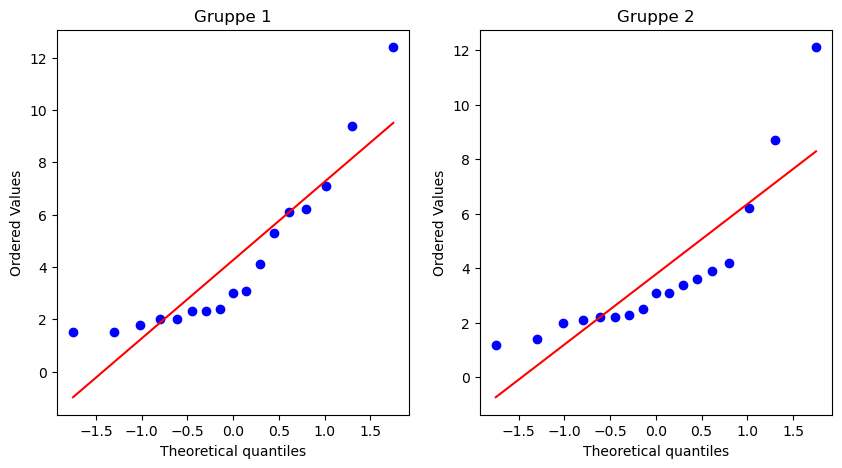

In [9]:
gruppe1 = np.array([6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1])
gruppe2 = np.array([2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4])

fig, ax = plt.subplots(1, 2, figsize=(10,5))
stats.probplot(gruppe1, dist="norm", plot=ax[0])
ax[0].set_title("Gruppe 1")

stats.probplot(gruppe2, dist="norm", plot=ax[1])
ax[1].set_title("Gruppe 2")

Quelle: https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

In [10]:
stats.levene(gruppe1, gruppe2)

LeveneResult(statistic=0.3819113641351362, pvalue=0.5409557773317198)

#### 3. (15%) Aufgrund der Ergebnise aus 1. und 2., welche Art von Hypothesentest brauchen Sie für diese Aufgabe? Führen Sie den Test durch.

Nach dem Diagramm aus der Vorlesung müssen wir den Wilcoxon-Mann-Whitney Test durchführen

In [11]:
stats.mannwhitneyu(gruppe1, gruppe2)

MannwhitneyuResult(statistic=151.5, pvalue=0.8226484074918565)

Zu einem Signifikanzniveau von 0,05 können wir H0 nicht ablehnen. Die Gruppen können also aus der gleichen Verteilung stammen, was bedeuten würde, dass sie für die Bearbeitung gleich lange brauchen.

---